In [7]:
import numpy as np
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ruta al directorio principal que contiene las subcarpetas de clases
data_dir = "archive"

# Tamaño de lote para cargar imágenes
batch_size = 32

# Configura el generador de datos para cargar y dividir automáticamente los datos
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normaliza los valores de píxeles
    validation_split=0.2,  # Porcentaje de datos para validación
)

# Crear generadores de datos nuevamente
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Obtener todos los lotes de datos de entrenamiento y prueba
X_train_batches, y_train_batches = [], []
X_test_batches, y_test_batches = [], []

for i in range(len(train_generator)):
    X_train_batch, y_train_batch = next(train_generator)
    X_train_batches.append(X_train_batch)
    y_train_batches.append(y_train_batch)

for i in range(len(validation_generator)):
    X_test_batch, y_test_batch = next(validation_generator)
    X_test_batches.append(X_test_batch)
    y_test_batches.append(y_test_batch)

# Concatenar los lotes en matrices 4D
X_train = np.concatenate(X_train_batches)
y_train = np.concatenate(y_train_batches)
X_test = np.concatenate(X_test_batches)
y_test = np.concatenate(y_test_batches)

# Aplana las imágenes para que sean 2D
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Convierte las etiquetas one-hot en etiquetas simples
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

# Crea un clasificador SVM con un kernel lineal
clf = svm.SVC(kernel='linear', C=1)

# Entrena el clasificador SVM con los datos de entrenamiento
clf.fit(X_train_flat, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = clf.predict(X_test_flat)

# Evalúa el rendimiento del clasificador
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))

# Si deseas medir la precisión, puedes hacerlo así:
accuracy = np.mean(y_pred == y_test)
print(f'Precisión: {accuracy * 100:.2f}%')


Found 4437 images belonging to 12 classes.
Found 1102 images belonging to 12 classes.
Matriz de Confusión:
[[14  0  0  1  6  5 34  0  0  0  0  1]
 [ 0 65  4  1  1  1  0  0  7  1  9  1]
 [ 0  4 41  1  4  5  2  1  3  0  2  4]
 [ 0  3  3 87  0  7  0 10 16  7  3  6]
 [ 7  1  2  1  9  4 19  0  3  0  0  4]
 [ 6  4  1  9  6 36 27  0  7  1  6  4]
 [34  0  2  3 13 15 84  0  1  0  0  0]
 [ 0  7  0 16  0  0  0 20  5  1  1  1]
 [ 3  1  3  9  5  8  6  0 72  3  1 10]
 [ 0  5  1 12  3  2  0  2 10 14  4  1]
 [ 1  9  0  5  1  9  2  0  1  6 75  6]
 [ 1  1  8  9 16 24 11  2  7  0  1 12]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.21      0.23      0.22        61
           1       0.65      0.72      0.68        90
           2       0.63      0.61      0.62        67
           3       0.56      0.61      0.59       142
           4       0.14      0.18      0.16        50
           5       0.31      0.34      0.32       107
           6      

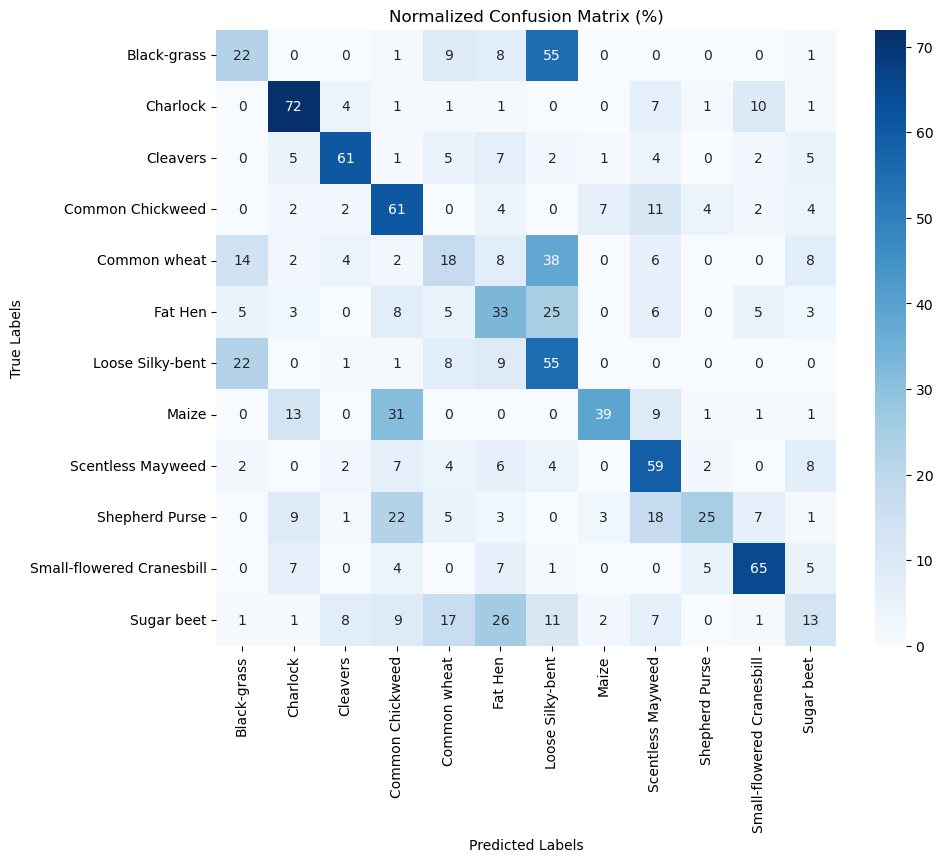

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
cm_normalized = (cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] *100.).astype(int)

# Obtén los nombres de las clases
class_names = list(train_generator.class_indices.keys())

# Plotea la matriz de confusión normalizada
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.0f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix (%)')
plt.show()